<a href="https://colab.research.google.com/github/navaneethss123/web-scrapping/blob/main/Web_Scraping_and_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OMG - CSE18R381 – Data Visualization for Analytics**

We Done Web Scraping to Get the real time Dataset.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
 
url = 'https://www.skysports.com/premier-league-table/2021'
 
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
 
league_table = soup.find('table', class_ = 'standing-table__table callfn')
 
premier_league = []
for team in league_table.find_all('tbody'):
    rows = team.find_all('tr')
    for row in rows:
        pl_team = row.find('td', class_ = 'standing-table__cell standing-table__cell--name').text.strip()
        pl_pi = row.find_all('td', class_ = 'standing-table__cell')[2].text
        pl_no_of_wins = row.find_all('td', class_ = 'standing-table__cell is-hidden--bp35')[0].text
        pl_no_of_draws = row.find_all('td', class_ = 'standing-table__cell is-hidden--bp35')[1].text
        pl_no_of_losses = row.find_all('td', class_ = 'standing-table__cell is-hidden--bp35')[2].text
        pl_no_of_goals_scored = row.find_all('td', class_ = 'standing-table__cell is-hidden--bp35')[3].text
        pl_no_of_goals_conceded = row.find_all('td', class_ = 'standing-table__cell is-hidden--bp35')[4].text
        pl_diff_btw_scored_conceded = row.find_all('td', class_ = 'standing-table__cell')[8].text
        pl_points = row.find_all('td', class_ = 'standing-table__cell')[9].text
        
        league = {
            'Team': pl_team,
            'Passing Interception': pl_pi,
            'Wins': pl_no_of_wins,
            'Draws': pl_no_of_draws,
            'Losses': pl_no_of_losses,
            'Goals_Scored': pl_no_of_goals_scored,
            'Goals_Conceded': pl_no_of_goals_conceded,
            'Diff': pl_diff_btw_scored_conceded,
            'Points': pl_points
        }
        premier_league.append(league)
 
 
df = pd.DataFrame(premier_league)
df.to_csv('premier_league.csv')
df

,Team,Passing Interception,Wins,Draws,Losses,Goals_Scored,Goals_Conceded,Diff,Points
0,Manchester City,38,29,6,3,99,26,73,93
1,Liverpool,38,28,8,2,94,26,68,92
2,Chelsea,38,21,11,6,76,33,43,74
3,Tottenham Hotspur,38,22,5,11,69,40,29,71
4,Arsenal,38,22,3,13,61,48,13,69
5,Manchester United,38,16,10,12,57,57,0,58
6,West Ham United,38,16,8,14,60,51,9,56
7,Leicester City,38,14,10,14,62,59,3,52
8,Brighton and Hove Albion,38,12,15,11,42,44,-2,51
9,Wolverhampton Wanderers,38,15,6,17,38,43,-5,51


In [ ]:
#import pandas and read the csv file(Data Processing)
import pandas as pd 
data = pd.read_csv("premier_league.csv")

In [ ]:
#Display the first five rows
data.head()

,Unnamed: 0,Team,Passing Interception,Wins,Draws,Losses,Goals_Scored,Goals_Conceded,Diff,Points
0,0,Manchester City,38,29,6,3,99,26,73,93
1,1,Liverpool,38,28,8,2,94,26,68,92
2,2,Chelsea,38,21,11,6,76,33,43,74
3,3,Tottenham Hotspur,38,22,5,11,69,40,29,71
4,4,Arsenal,38,22,3,13,61,48,13,69


In [ ]:
#Display the last five rows
data.tail()

,Unnamed: 0,Team,Passing Interception,Wins,Draws,Losses,Goals_Scored,Goals_Conceded,Diff,Points
15,15,Everton,38,11,6,21,43,66,-23,39
16,16,Leeds United,38,9,11,18,42,79,-37,38
17,17,Burnley,38,7,14,17,34,53,-19,35
18,18,Watford,38,6,5,27,34,77,-43,23
19,19,Norwich City,38,5,7,26,23,84,-61,22


In [ ]:
data.describe()

,Unnamed: 0,Passing Interception,Wins,Draws,Losses,Goals_Scored,Goals_Conceded,Diff,Points
count,20.00000,20.0,20.000000,20.0000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,9.50000,38.0,14.600000,8.8000,14.600000,53.550000,53.550000,0.000000,52.60000
std,5.91608,0.0,6.762124,3.5333,6.451438,19.454332,16.223683,33.829293,19.34561
min,0.00000,38.0,5.000000,3.0000,2.000000,23.000000,26.000000,-61.000000,22.00000
25%,4.75000,38.0,10.500000,6.0000,11.750000,42.000000,43.750000,-20.000000,39.75000
50%,9.50000,38.0,13.000000,8.0000,14.500000,49.000000,53.500000,-2.000000,50.00000
75%,14.25000,38.0,17.250000,11.0000,18.000000,61.250000,63.000000,10.000000,60.75000
max,19.00000,38.0,29.000000,15.0000,27.000000,99.000000,84.000000,73.000000,93.00000


In [ ]:
data.Wins

0     29
1     28
2     21
3     22
4     22
5     16
6     16
7     14
8     12
9     15
10    13
11    11
12    13
13    13
14     9
15    11
16     9
17     7
18     6
19     5
Name: Wins, dtype: int64

In [ ]:
data.Goals_Scored

0     99
1     94
2     76
3     69
4     61
5     57
6     60
7     62
8     42
9     38
10    44
11    50
12    48
13    52
14    43
15    43
16    42
17    34
18    34
19    23
Name: Goals_Scored, dtype: int64

In [ ]:
data.Team

0              Manchester City
1                    Liverpool
2                      Chelsea
3            Tottenham Hotspur
4                      Arsenal
5            Manchester United
6              West Ham United
7               Leicester City
8     Brighton and Hove Albion
9      Wolverhampton Wanderers
10            Newcastle United
11              Crystal Palace
12                   Brentford
13                 Aston Villa
14                 Southampton
15                     Everton
16                Leeds United
17                     Burnley
18                     Watford
19                Norwich City
Name: Team, dtype: object

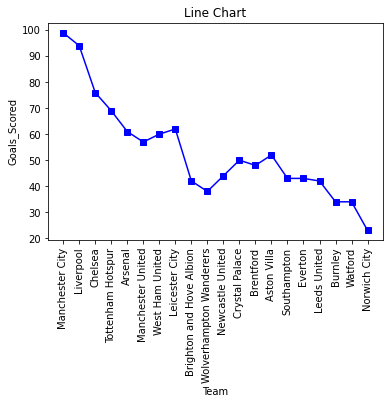

The above plot provides the Manchester City is Scored high goal than other teams in the premier league 2021 - 2022


In [ ]:
import matplotlib.pyplot as plt
x = data.Team
y = data.Goals_Scored
plt.plot(x,y,'-s',color='b')
plt.title("Line Chart")
plt.ylabel("Goals_Scored")
plt.xticks(rotation='vertical')
plt.xlabel("Team")
plt.show()
print("The above plot provides the Manchester City is Scored high goal than other teams in the premier league 2021 - 2022")

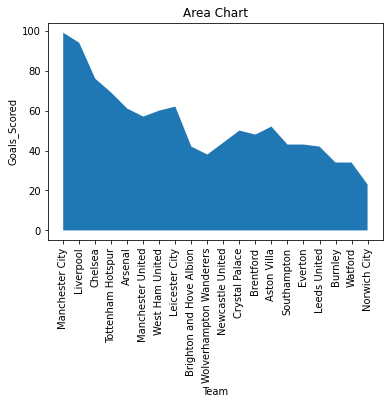

The above plot provides the Manchester City is Scored high goal than other teams in the premier league 2021 - 2022


In [ ]:
import matplotlib.pyplot as plt
x = data.Team
y = data.Goals_Scored
plt.fill_between(x,y)
plt.title("Area Chart")
plt.ylabel("Goals_Scored")
plt.xticks(rotation='vertical')
plt.xlabel("Team")
plt.show()
print("The above plot provides the Manchester City is Scored high goal than other teams in the premier league 2021 - 2022")

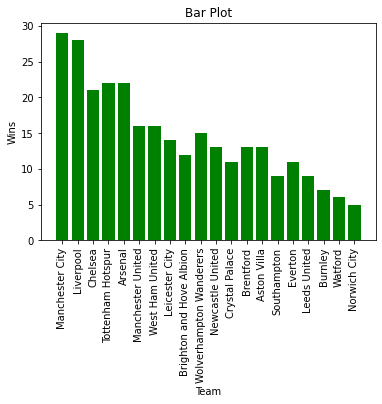

The above plot provides the Norwich City is Scored lower Wins than other teams in the premier league 2021 - 2022


In [ ]:
import matplotlib.pyplot as plt
x = data.Team
y = data.Wins
plt.bar(x,y,color='g')
plt.title("Bar Plot")
plt.ylabel("Wins")
plt.xticks(rotation='vertical')
plt.xlabel("Team")
plt.show()
print("The above plot provides the Norwich City is Scored lower Wins than other teams in the premier league 2021 - 2022")

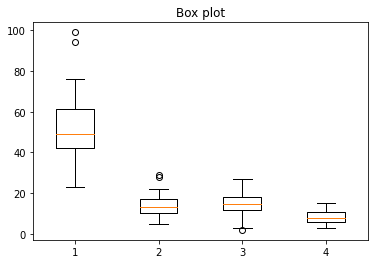

 This plot describes Goals-Scored, Wins, Losses, Draws in the premier league 2021 – 2022.


In [ ]:
import matplotlib.pyplot as plt
items = [data.Goals_Scored,data.Wins,data.Losses,data.Draws]
plt.boxplot(items)
plt.title("Box plot")
plt.show()
print(" This plot describes Goals-Scored, Wins, Losses, Draws in the premier league 2021 – 2022.")

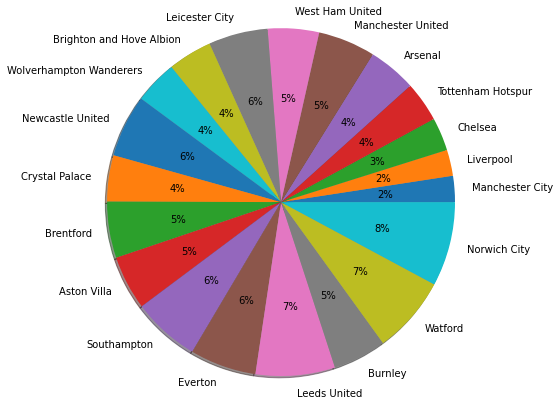

In [ ]:
import matplotlib.pyplot as plt
x = data.Goals_Conceded
plt.pie(x,labels = data.Team,radius = 2,shadow = 'True',autopct='%.00f%%')
plt.show()
print("The More Portion of the Wedge(ie.,8%) shows the Most Goals not prevented. Here its show Norwich City has most missed in the premier league 2021 - 2022")

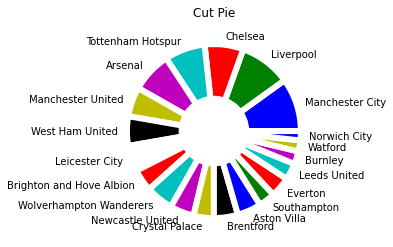

The above plot divides the entire team and shows their Wins in the premier league 2021 - 2022


In [ ]:
import matplotlib.pyplot as plt
x = data.Team
y = data.Wins
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.pie(y, labels=x, colors=['b','g','r','c','m','y','k','w','r','c','m','y','k','b','g','r','c','m','y'], wedgeprops={'linewidth':6,'edgecolor':'white'})
plt.title("Cut Pie")
p = plt.gcf()
p.gca().add_artist(my_circle)
# Show the graph
plt.show()
print("The above plot divides the entire team and shows their Wins in the premier league 2021 - 2022")

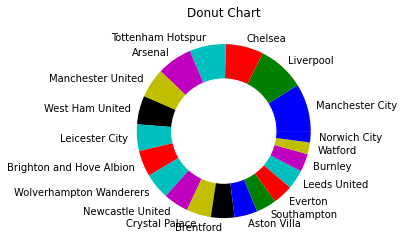

The above plot divides the entire team and shows their Points in the premier league 2021 - 2022


In [ ]:
import matplotlib.pyplot as plt
x = data.Team
y = data.Points
my_circle = plt.Circle( (0,0), 0.6, color='white')
plt.pie(y, labels=x, colors=['b','g','r','c','m','y','k','c','r','c','m','y','k','b','g','r','c','m','y'])
plt.title("Donut Chart")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
print("The above plot divides the entire team and shows their Points in the premier league 2021 - 2022")

The More Portion of the Wedge(ie.,8%) shows the Most Goals not prevented. Here its show Norwich City has most missed in the premier league 2021 - 2022


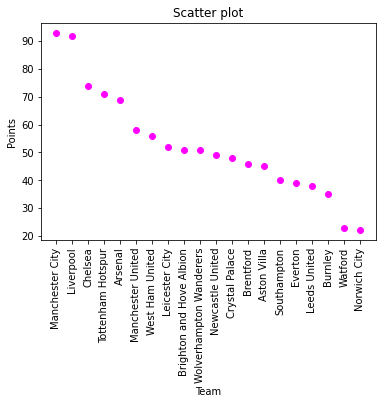

The above plot provides the Manchester City is Scored high goal than other teams in the premier league 2021 - 2022


In [ ]:
import matplotlib.pyplot as plt
x = data.Team
y = data.Points
plt.scatter(x,y,color='magenta')
plt.title("Scatter plot")
plt.ylabel("Points")
plt.xticks(rotation='vertical')
plt.xlabel("Team")
plt.show()
print("The above plot provides the Manchester City is Scored high goal than other teams in the premier league 2021 - 2022")

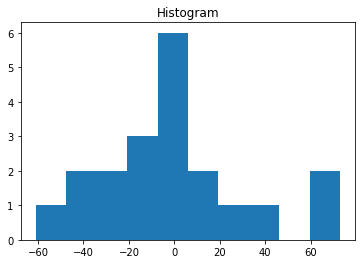

The Frequency Distrubition show both less and more difference in the graph


In [ ]:
import matplotlib.pyplot as plt
x = data.Diff
plt.hist(x)
plt.title('Histogram')
plt.show()
print("The Frequency Distrubition show both less and more difference in the graph")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


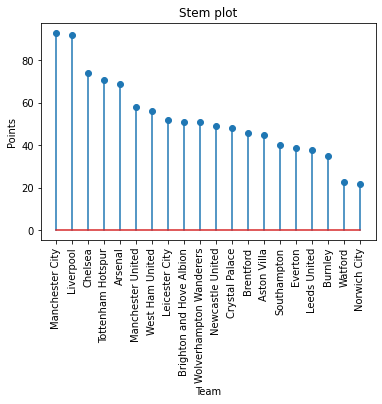

In This Stem Plot Show That The Most Losses in the preimer league is Liverpool


In [ ]:
import matplotlib.pyplot as plt
x = data.Team
y = data.Points
plt.stem(x,y)
plt.title("Stem plot")
plt.ylabel("Points")
plt.xticks(rotation='vertical')
plt.xlabel("Team")
plt.show()
print("In This Stem Plot Show That The Most Losses in the preimer league is Liverpool")

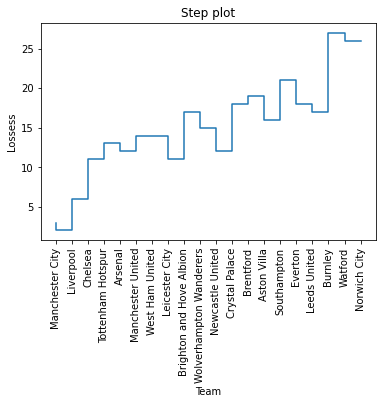

The Step Plot show that Norwich City has the most lossess in the premier league 2021 - 2022


In [ ]:
import matplotlib.pyplot as plt
y = data.Losses
x = data.Team
plt.step(x,y)
plt.title("Step plot")
plt.ylabel("Lossess")
plt.xticks(rotation='vertical')
plt.xlabel("Team")
plt.show()
print('The Step Plot show that Norwich City has the most lossess in the premier league 2021 - 2022')

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


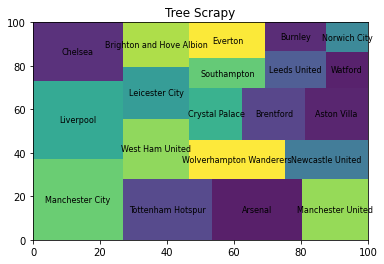

The above plot provides the Manchester City is Scored high number of    goal than other teams in the premier league 2021 - 2022


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import squarify
import pandas as pd
df = pd.DataFrame({})
x = data.Team
y = data.Wins
squarify.plot(sizes=y,label=x,text_kwargs={'fontsize':8, 'fontname':"Times New Roman"}, alpha=0.9)
plt.title("Tree Scrapy")
plt.show()
print("The above plot provides the Manchester City is Scored high number of    goal than other teams in the premier league 2021 - 2022")

**Done by
AKILESH S (9920004006), 
NAVANEETH S S (9920004092),
JIHAD K M (9920004054),
Guide: Mr. R. RAJA SUBRAMANIAN.**
